In [1]:
import pandas as pd 
import numpy as np 
from sklearn.naive_bayes import GaussianNB
df = pd.read_csv("RedWhiteWine.csv")

In [2]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


Before we go to far, lets look at a bit of an interesting correlation 

In [3]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Class'],
      dtype='object')


In [4]:
feat_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','density','pH','sulphates','alcohol','quality']

In [5]:
import itertools 
def feat_engine(feats, n):
    ls=[]
    for i in itertools.combinations(feats, len(feats)-n):
        ls.append(list(i))
    return ls 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import ast
y = df['Class']
dict_feat_combo_acc = {}
dict_feat_combo_auc = {}
dict_feat_comb_len_acc = {}
dict_feat_comb_len_auc = {}

for j in range(len(feat_cols)):
    feat_combs=feat_engine(feat_cols, j)
    for i in feat_combs:
        X = df[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        gnb = GaussianNB()
        gnb_model = gnb.fit(X_train, y_train)
        y_pred = gnb_model.predict(X_test)
        acc = (sum(y_pred!=y_test)/len(y_test))*100
        auc_score = roc_auc_score(y_test, y_pred)
        dict_feat_combo_auc[str(i)]=auc_score
        dict_feat_combo_acc[str(i)]=acc



In [7]:
best_acc = min(dict_feat_combo_acc.values())
best_acc_inverse = (100-best_acc)
best_acc_inverse #The actual percentage correctly classified


96.61538461538461

This is the highest accuracy for any combination of features for our model; lets find what the features were that gave us this accuracy.
To find the combination of features:
https://stackoverflow.com/questions/8023306/get-key-by-value-in-dictionary Getting the key of a dictionary by looking up the value:

In [8]:
best_feats_acc = list(dict_feat_combo_acc.keys())[list(dict_feat_combo_acc.values()).index(best_acc)]
best_feats_acc



"['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'pH', 'sulphates']"

The output of the above is a string, I would like to turn it into a list: https://stackoverflow.com/questions/1894269/convert-string-representation-of-list-to-list

In [9]:
import ast
best_feats_acc = ast.literal_eval(best_feats_acc)

best_feats_acc = [n.strip() for n in best_feats_acc]

In [10]:
best_feats_acc

['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'density',
 'pH',
 'sulphates']

The list above is the feature combination that yields the highest accuracy 

In [11]:
best_auc_score = max(dict_feat_combo_auc.values())
best_auc_score

0.9632116176735909

In [12]:
best_feats_auc = list(dict_feat_combo_auc.keys())[list(dict_feat_combo_auc.values()).index(best_auc_score)]
best_feats_auc

"['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates']"

In [13]:
best_feats_auc = ast.literal_eval(best_feats_auc)
best_feats_auc = [n.strip() for n in best_feats_auc]

In [14]:
best_feats_auc

['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates']

The accuracy for the feature combination with the highest AUC score is:

In [15]:
best_auc_acc = 100-(dict_feat_combo_acc[str(best_feats_auc)])
best_auc_acc

96.38461538461539

The AUC score of the feature combination for the highest accuracy is 

In [16]:
best_acc_auc = dict_feat_combo_auc[str(best_feats_acc)]
best_acc_auc

0.9628859485228688

In [17]:
(best_auc_score - best_acc_auc)*100

0.032566915072207436

The difference between the highest AUC score for our feature subest and the highest accuracy subset's AUC score is less than 1/20th of a percent, so the addition of the "free sulfur dioxide" and "chlorides" features barely results in a better AUC score but actually hurts the accuracy of our classifier! 

It would be interesting to see how both the accuracy and AUC scores change with respect to the number of variables that we use from this dataset. I'm going to attempt to make a visualization that will intimate this for both metrics using matplotlib; this will be accomplished by plotting the max, average, and minimum AUC and accuracy scores for each number of features. This provides a nice way to intuitively understand our model's sensitivity to it's feature inputs

In [18]:
new_acc_dict = {'11':[],'10':[],"9":[],"8":[],"7":[],"6":[],"5":[],"4":[],"3":[],"2":[],"1":[]}

for i in dict_feat_combo_acc.keys():
    i = ast.literal_eval(i)
    i = [n.strip() for n in i]
    
    new_acc_dict[str(len(i))].append(dict_feat_combo_acc[str(i)])

In [19]:
new_auc_dict = {'11':[],'10':[],"9":[],"8":[],"7":[],"6":[],"5":[],"4":[],"3":[],"2":[],"1":[]}
for i in dict_feat_combo_auc.keys():
    i = ast.literal_eval(i)
    i = [n.strip() for n in i]
    new_auc_dict[str(len(i))].append(dict_feat_combo_auc[str(i)])

The dictionaries below will be the ones that we will use for plotting. 

In [20]:
newest_acc_dict = {'11':[],'10':[],"9":[],"8":[],"7":[],"6":[],"5":[],"4":[],"3":[],"2":[],"1":[]}
for i in new_auc_dict:
    newest_acc_dict[i].append((min(new_acc_dict[i])))
    newest_acc_dict[i].append((np.mean(new_acc_dict[i])))
    newest_acc_dict[i].append((max(new_acc_dict[i])))
    

In [21]:
newest_auc_dict = {'11':[],'10':[],"9":[],"8":[],"7":[],"6":[],"5":[],"4":[],"3":[],"2":[],"1":[]}
for i in new_auc_dict:
    newest_auc_dict[str(i)].append((min(new_auc_dict[i])))
    newest_auc_dict[str(i)].append((np.mean(new_auc_dict[i])))
    newest_auc_dict[str(i)].append((max(new_auc_dict[i])))

In [22]:
import matplotlib.pylab as plt
x1 = list(newest_auc_dict.keys())
x1 = list(map(int, x1))
y1 = list(newest_auc_dict.values())

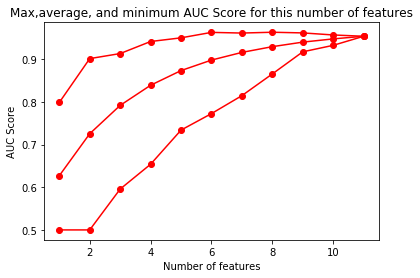

In [23]:
plt.plot(x1,y1,'-ro')
plt.xlabel("Number of features")
plt.ylabel("AUC Score")
plt.title("Max,average, and minimum AUC Score for this number of features")
plt.show()

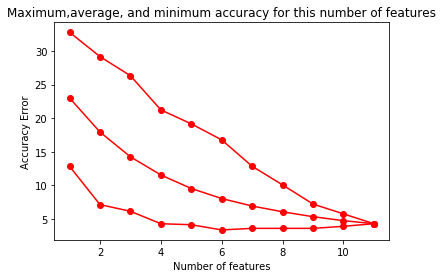

In [24]:
x2 =  list(newest_acc_dict.keys())
x2 = list(map(int, x1))
y2 = list(newest_acc_dict.values())
plt.plot(x2,y2,'-ro')
plt.xlabel("Number of features")
plt.ylabel("Accuracy Error")
plt.title("Maximum,average, and minimum accuracy for this number of features")
plt.show()

How are visualizations like the one above helpful? They can help inform us about how changes to the number and type of features used in our model can affect the cogency of our predictions. For example

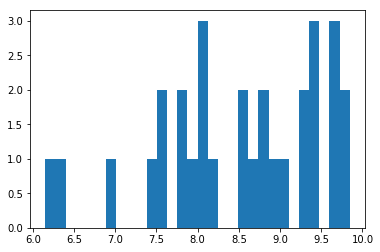

In [25]:
feats_3_acc = sorted(new_acc_dict['3'])[0:30]
plt.hist(feats_3_acc,bins=30)
plt.show()

In [26]:
feats_3_acc

[6.153846153846154,
 6.384615384615384,
 6.923076923076923,
 7.384615384615385,
 7.538461538461538,
 7.615384615384616,
 7.769230769230768,
 7.846153846153846,
 7.923076923076923,
 8.0,
 8.0,
 8.0,
 8.153846153846153,
 8.538461538461538,
 8.615384615384615,
 8.692307692307692,
 8.76923076923077,
 8.846153846153847,
 8.923076923076923,
 9.0,
 9.230769230769232,
 9.230769230769232,
 9.384615384615385,
 9.384615384615385,
 9.384615384615385,
 9.615384615384617,
 9.615384615384617,
 9.692307692307692,
 9.769230769230768,
 9.846153846153847]

In [27]:
master_acc_dict = {}
master_auc_dict = {}
for i in dict_feat_combo_acc:
    i = ast.literal_eval(i)
    i = [n.strip() for n in i]
    
    master_acc_dict[str(i)] = [dict_feat_combo_acc[str(i)],len(i)]
    master_auc_dict[str(i)] = [dict_feat_combo_auc[str(i)],len(i)]

In [35]:
list(master_acc_dict.keys())[list(master_acc_dict.values()).index([9.384615384615385,
  3])]

"['fixed acidity', 'volatile acidity', 'citric acid']"

Some AUC scores and accuracy scores can be repeats for the same number of features (one can see this by looking at the printed output of feats_3_acc above). Here I will write a function that will return the feature combinations for these repeat instances, that will take the AUC score or accuracy score alongside the number of features, and return the features used to yield that specific value of the appropriate performance metric. 

In [29]:
def feat_combo_finder(master_dict,metric_and_feat_len):
    list_of_feat_combos = []
    for i in master_acc_dict.keys():
        if master_dict[i] == metric_and_feat_len:
            list_of_feat_combos.append(i)
    return list_of_feat_combos
        

In [30]:
feat_combo_finder(master_acc_dict,[9.384615384615385,
  3])

["['fixed acidity', 'volatile acidity', 'citric acid']",
 "['residual sugar', 'chlorides', 'alcohol']",
 "['residual sugar', 'chlorides', 'quality']"]

From the above, we can see that the quality and alcohol features are relatively interchangeable when used with the residual sugar and chlorides features. This is a running theme for larger sized feature combinations as well. This provides a way to see whats going on "under the hood" of the Naive Bayes Sklearn algorithm. I'm sure that there is a way to use built in attributes of the sklearn model to gleam some of this same information, but I really enjoyed making these dictionaries and functions for this purpose, and I feel like by doing this the long way I gained a better appreciation for what sklearn does for you in the background during model training. 
Possible next steps for a project like this would be to try and use RegExs to see what features are most common for high accuracy/AUC feature combinations across the higher dimensional models. I think this would be very interesting, but again I'm sure there is any easier way to do this using things that are built into sklearn, but still a fun thing to try nonetheless!